In [ ]:
# install googletrans using pip
!pip3 install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import googletrans
from googletrans import Translator

In [ ]:
df = pd.read_csv('/content/sample_data/data_fix_bersih_eng2.csv')

In [ ]:
df.head()

,Tweet
0,"Friends, peace, tolerance, strong base, close ..."
1,"What's the reason, ma'am, if you leave gas, wh..."
2,It's important that it's appropriate to have f...
3,Different religions accept Indonesia's creativ...
4,"The country itself is different, the nation is..."


In [ ]:
from tweepy import OAuthHandler
import tweepy
import csv

In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import preprocessor as p
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = df

In [ ]:
ps = PorterStemmer()

def stemming_data(x):
    return ps.stem(x)

data['Tweet'] = data['Tweet'].apply(stemming_data)

In [ ]:
data_tweet = list(data['Tweet'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 282
Netral = 79
Negatif = 97

Total Data : 458


In [ ]:
status = pd.DataFrame({'klasifikasi': status})
data['klasifikasi'] = status
data.head()

,Tweet,klasifikasi
0,"friends, peace, tolerance, strong base, close ...",Negatif
1,"what's the reason, ma'am, if you leave gas, wh...",Positif
2,it's important that it's appropriate to have f...,Positif
3,different religions accept indonesia's creativ...,Positif
4,"the country itself is different, the nation is...",Netral


In [ ]:
data.to_excel('dataklasifikasi.xlsx',encoding='utf8', index=False)

In [ ]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

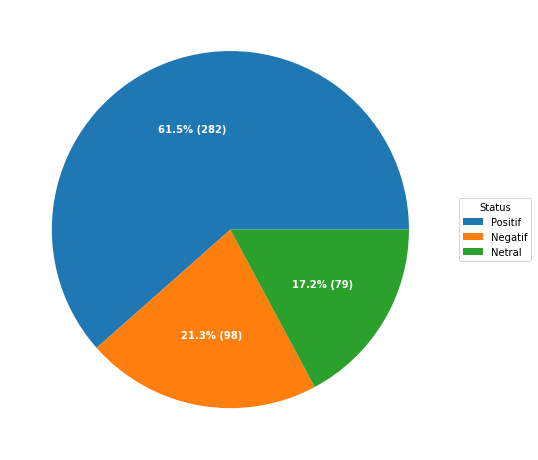

In [ ]:
label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif+1, total_negatif+1, total_netral]

show_pie(label, count_data, "Status")

In [ ]:
!pip install nltk
import nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
dataset = data.drop([], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]
data.head()

,Tweet,klasifikasi
0,"friends, peace, tolerance, strong base, close ...",Negatif
1,"what's the reason, ma'am, if you leave gas, wh...",Positif
2,it's important that it's appropriate to have f...,Positif
3,different religions accept indonesia's creativ...,Positif
4,"the country itself is different, the nation is...",Netral


In [ ]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if(n[1] == 'Positif'):
      set_positif.append(n)
    elif(n[1] == 'Negatif'):
      set_negatif.append(n)
    else:
      set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
     train_set.append(n)

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print('Akurasi Test:', cl.accuracy(dataset))

Akurasi Test: 0.759825327510917


In [ ]:
data_tweet = list(data['Tweet'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1

    status.append(analysis.classify())
    total += 1

print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 384
Netral = 30
Negatif = 44

Total Data : 458


In [ ]:
status = pd.DataFrame({'klasifikasi_bayes': status})
data['klasifikasi_bayes'] = status
data.tail()

,Tweet,klasifikasi,klasifikasi_bayes
453,"apple launches different variants, the gossip ...",Netral,Positif
454,"watch out, division board members are worried ...",Positif,Positif
455,"it's rare, you've gone through a cycle, rich p...",Positif,Positif
456,"attract wolves, social animals, adhere to the ...",Negatif,Positif
457,experience the middle cycle of different inter...,Positif,Positif


In [ ]:
data.to_excel('hasilklasifikasibayes.xlsx',encoding='utf8', index=False)

458


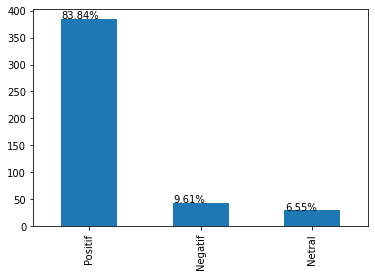

In [ ]:
s = pd.value_counts(data['klasifikasi_bayes'])
ax = s.plot.bar()
n = len(data.index)
print (n)
for p in ax.patches:
    ax.annotate(str(round(p.get_height() / n * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

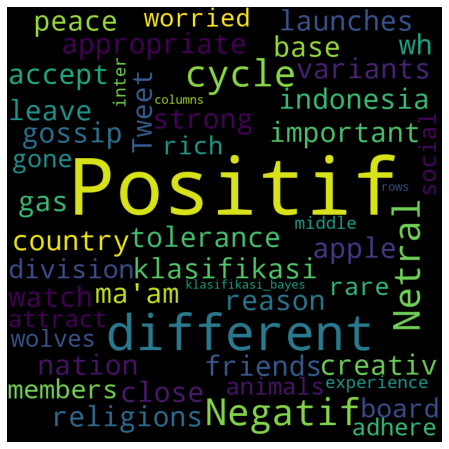

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 1000
                      , min_font_size = 20).generate(str(data))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
def generate_wordcloud(all_words):
    global WorldCloud
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

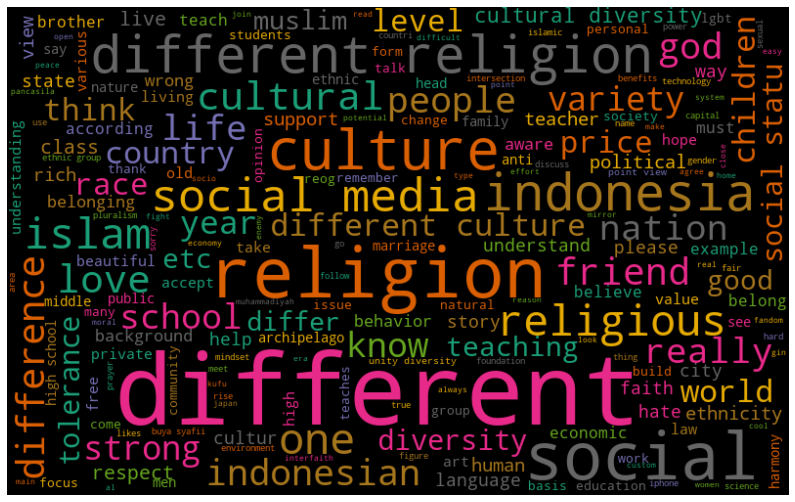

In [ ]:
all_words = ' '.join([text for text in data['Tweet'][data.klasifikasi_bayes == 'Positif']])
generate_wordcloud(all_words)

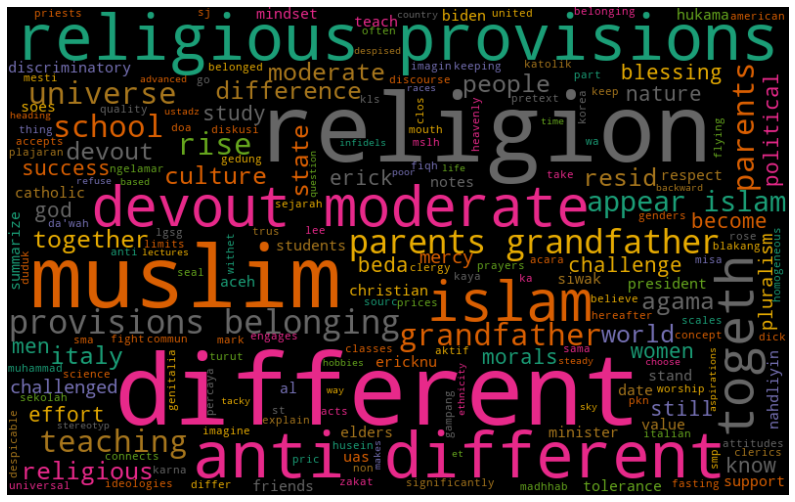

In [ ]:
all_words = ' '.join([text for text in data['Tweet'][data.klasifikasi_bayes == 'Netral']])
generate_wordcloud(all_words)

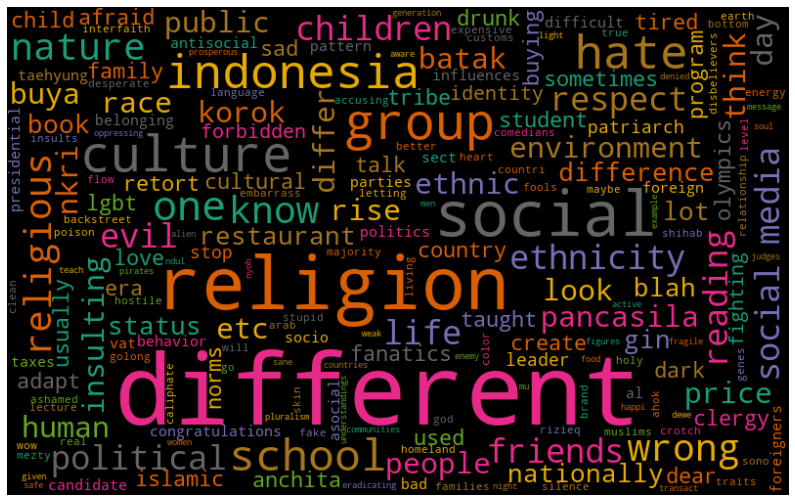

In [ ]:
all_words = ' '.join([text for text in data['Tweet'][data.klasifikasi_bayes == 'Negatif']])
generate_wordcloud(all_words)

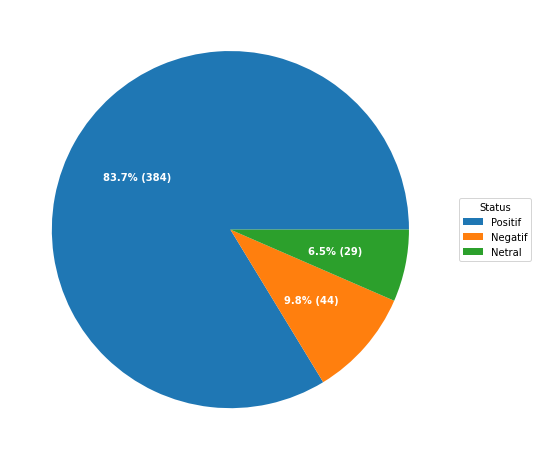

In [ ]:
label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif+1, total_negatif+1, total_netral]

show_pie(label, count_data, "Status")

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(data['klasifikasi'], data['klasifikasi_bayes']))

              precision    recall  f1-score   support

     Negatif       1.00      0.45      0.62        97
      Netral       0.87      0.33      0.48        79
     Positif       0.72      0.99      0.83       282

    accuracy                           0.76       458
   macro avg       0.86      0.59      0.65       458
weighted avg       0.81      0.76      0.73       458

